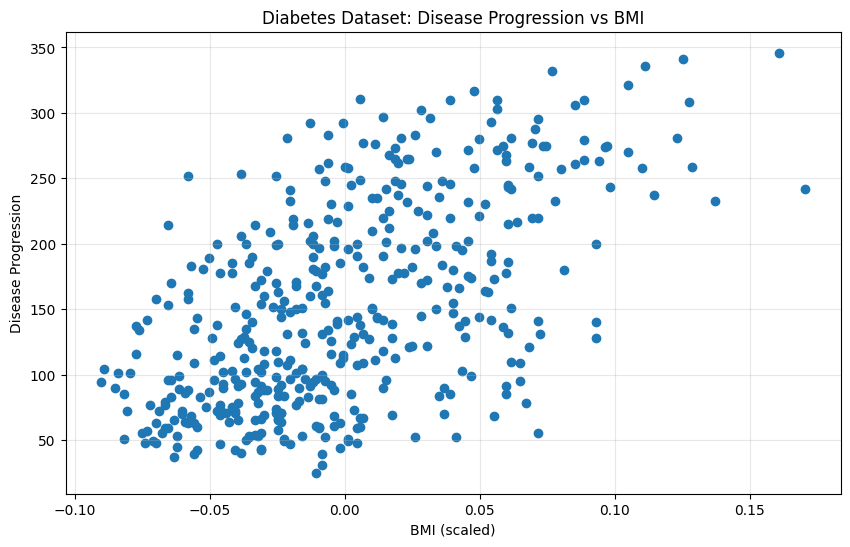

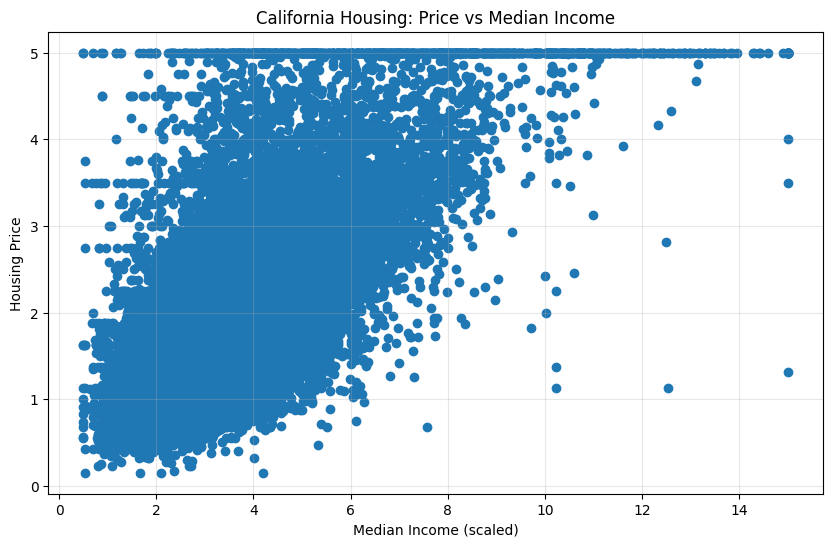

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


## For squre poly funciton
# # make data
# X = np.linspace(-3, 3, 50)                # 50 points between -3 and 3
# Y = 1 + 2*X + X**2 + np.random.randn(50)*2  # real function + some noise

# # visualize
# plt.scatter(X, Y, color='blue')
# plt.title("Curved (Non-Linear) Data")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()

## For squre root ploy feature
# np.random.seed(42)
# X = np.linspace(1, 100, 50)  # Domain from 1-100
# Y = 5 * np.sqrt(X) + 10 + np.random.randn(50) * 2

# plt.figure(figsize=(10, 6))
# plt.scatter(X, Y)
# plt.title("Growth with Diminishing Returns")
# plt.xlabel("Investment/Effort (X)")
# plt.ylabel("Return/Outcome (Y)")
# plt.grid(True, alpha=0.3)
# plt.show()
# Load real data from sklearn

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data[:, 2]  # Using a single feature (BMI)
Y_diabetes = diabetes.target

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_diabetes, Y_diabetes)
plt.title("Diabetes Dataset: Disease Progression vs BMI")
plt.xlabel("BMI (scaled)")
plt.ylabel("Disease Progression")
plt.grid(True, alpha=0.3)
plt.show()

# Set up data for polynomial regression
X = X_diabetes
Y = Y_diabetes

# Load the diabetes dataset
california = fetch_california_housing()
X_california = california.data[:, 0]  # Using the first feature (MedInc - median income)
Y_california = california.target  # Housing prices

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_california, Y_california)
plt.title("California Housing: Price vs Median Income")
plt.xlabel("Median Income (scaled)")
plt.ylabel("Housing Price")
plt.grid(True, alpha=0.3)
plt.show()

# Set up data for polynomial regression
X_root = X_california
Y_root = Y_california

In [4]:
def standardization_scalling(x , y):
    x_scaled = ( x - x.mean(axis=0)) / x.std(ddof=0)
    y_scaled=  ( y - y.mean()) / y.std()
    return x_scaled , y_scaled

In [5]:
X , Y = standardization_scalling(X , Y)

In [6]:
def add_polynomial_features(x , degree):
    x_poly = np.zeros((x.shape[0] , degree))
    for i in range(0 , degree):
        x_poly[: , i]  = x ** (i +1)
    return x_poly

def add_root_features(x, max_roots):
    x_roots = np.zeros((x.shape[0], max_roots))
    for i in range(0, max_roots):
       if i == 0:
            x_roots[: , i] = x
    else:
        power = 1/(i+1)
        x_roots[: , i] = np.abs(x) ** power * np.sign(x)
    return x_roots
print(add_polynomial_features(X , 3))

[[ 1.29708846  1.68243848  2.18227154]
 [-1.08218016  1.17111391 -1.26735624]
 [ 0.93453324  0.87335238  0.81617683]
 ...
 [-0.33441002  0.11183006 -0.03739709]
 [ 0.82123474  0.67442649  0.55386246]
 [-1.53537419  2.3573739  -3.61945104]]


In [7]:

def compute_cost(x , y ,  w , b):
    prediction = x @ w + b
    m = x.shape[0]
    return (1/(2*m)) * np.sum((prediction - y) ** 2)

In [8]:
def compute_gradients(x , y , w , b):
    m = x.shape[0]
    prediction = x @ w + b
    error  = prediction - y
    dj_dw = (1/m) * x.T @ error
    dj_db = (1/m) * np.sum(error)
    return dj_dw , dj_db



In [9]:
def gradient_descent(x , y , w, b , alpha , num_iters , tol=1e-5):
    compute_history = []
    prev_cost = None
    for i in range(num_iters):
        dj_dw , dj_db = compute_gradients(x , y, w , b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if(i%5000 == 0):
            cost = compute_cost(x , y, w, b)
            compute_history.append(cost) 
            if prev_cost is not None and prev_cost - cost > tol:
                print(f"Convered at iter:{i:6d} cost:{cost:.2e}")    
                break
            print(f"iter:{i:6d} cost:{cost:.2e}")
    return w , b , compute_history

In [10]:
degree = 3
x_poly = add_polynomial_features(X, degree)

w_init = np.zeros(degree)
b_init = 0
alpha = 0.001
iterations = 500000
tol = 1e-5

w_final, b_final, history = gradient_descent(x_poly, Y, w_init, b_init, alpha, iterations , tol=tol)

print("Weights:", w_final)
print("Bias:", b_final)

iter:     0 cost:4.96e-01
iter:  5000 cost:3.29e-01
iter: 10000 cost:3.27e-01
iter: 15000 cost:3.27e-01
iter: 20000 cost:3.27e-01


/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b


iter: 25000 cost:3.27e-01
iter: 30000 cost:3.27e-01
iter: 35000 cost:3.27e-01
iter: 40000 cost:3.27e-01
iter: 45000 cost:3.27e-01
iter: 50000 cost:3.27e-01
iter: 55000 cost:3.27e-01
iter: 60000 cost:3.27e-01
iter: 65000 cost:3.27e-01
iter: 70000 cost:3.27e-01
iter: 75000 cost:3.27e-01
iter: 80000 cost:3.27e-01
iter: 85000 cost:3.27e-01
iter: 90000 cost:3.27e-01
iter: 95000 cost:3.27e-01
iter:100000 cost:3.27e-01
iter:105000 cost:3.27e-01
iter:110000 cost:3.27e-01
iter:115000 cost:3.27e-01
iter:120000 cost:3.27e-01
iter:125000 cost:3.27e-01
iter:130000 cost:3.27e-01
iter:135000 cost:3.27e-01
iter:140000 cost:3.27e-01
iter:145000 cost:3.27e-01
iter:150000 cost:3.27e-01
iter:155000 cost:3.27e-01
iter:160000 cost:3.27e-01
iter:165000 cost:3.27e-01
iter:170000 cost:3.27e-01
iter:175000 cost:3.27e-01
iter:180000 cost:3.27e-01
iter:185000 cost:3.27e-01
iter:190000 cost:3.27e-01
iter:195000 cost:3.27e-01
iter:200000 cost:3.27e-01
iter:205000 cost:3.27e-01
iter:210000 cost:3.27e-01
iter:215000 

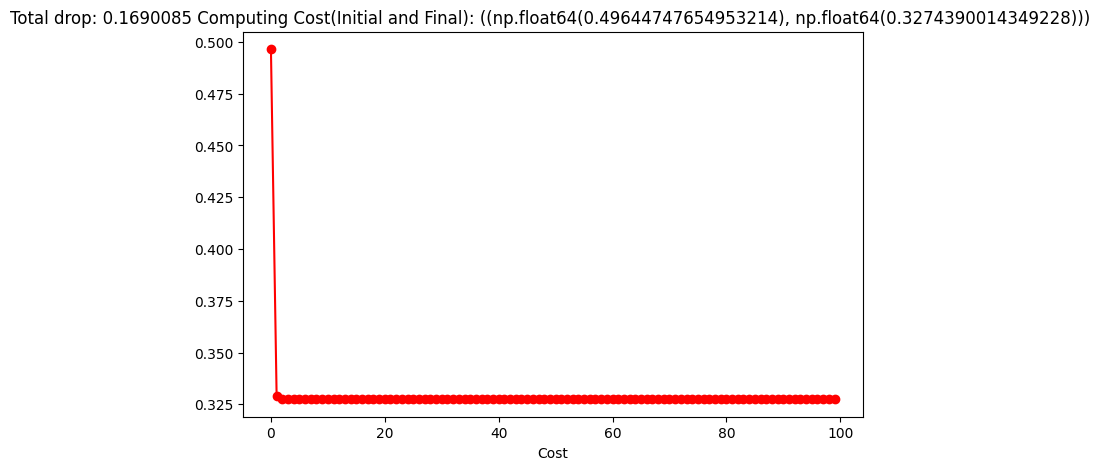

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8 , 5))
plt.plot(range(len(history)) , history , 
color='red',
marker='o')
plt.xlabel("Itaration every 5000")
plt.xlabel('Cost')
plt.title(f'Total drop: {history[0]-history[-1]:.7f} Computing Cost(Initial and Final): ({history[0] , history[-1]}) ')


value=False
if value:
    for i in range(len(history)):
        plt.text(i , history[i] , f'{history[i]:.3f}')
plt.show()

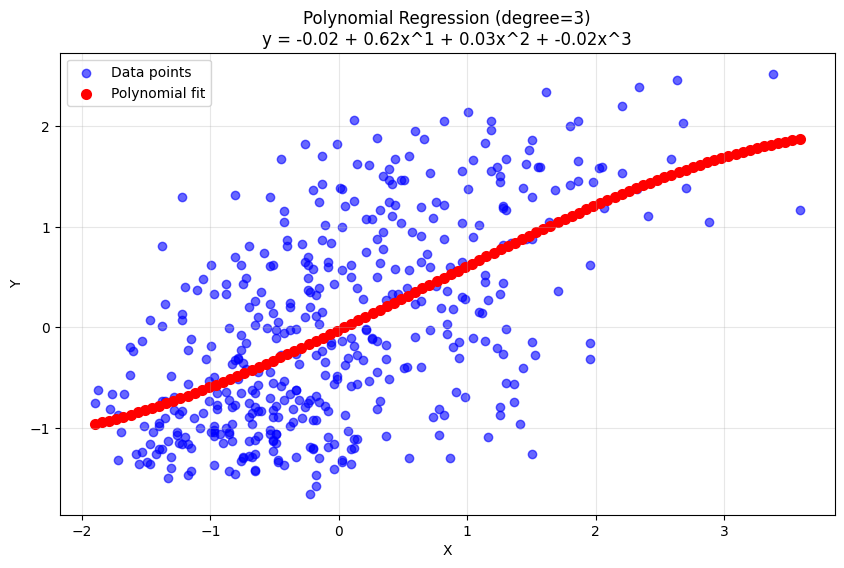

In [12]:
# Plot the original data and polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.6, label='Data points')

# Generate smooth curve for the model prediction
X_smooth = np.linspace(min(X), max(X), 100)  # 100 points for a smooth curve
X_poly_smooth = add_polynomial_features(X_smooth, degree)  # polynomial features
Y_pred = X_poly_smooth @ w_final + b_final  # model predictions

# Plot the prediction curve
plt.scatter(X_smooth, Y_pred, color='red', linewidth=2, label='Polynomial fit')

# Add model equation as text on the plot
equation = f'y = {b_final:.2f}'
for i in range(degree):
    equation += f' + {w_final[i]:.2f}x^{i+1}'
    
plt.title(f'Polynomial Regression (degree={degree})\n{equation}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Square Root Feature Dataset

Below we create a dataset that follows a square root pattern - it increases rapidly at first, then gradually levels off. This pattern is commonly found in:

- Learning curves (performance vs. training time)
- Economic returns on investment
- Population growth with limited resources
- Many natural phenomena with saturation effects

For this type of data, using square root features (x^(1/2), x^(1/3), etc.) will typically provide a better fit than polynomial features.

In [13]:
# Fit model with root features to the diminishing returns data
max_roots = 3  # Try with 3 root features: x, sqrt(x), cbrt(x)

# Use the root features function
x_roots = add_root_features(X_root, max_roots)

# Initialize weights and bias
w_init = np.zeros(max_roots)
b_init = 0
alpha = 0.01
iterations = 100000
tol = 1e-6

# Train model
w_root, b_root, root_history = gradient_descent(x_roots, Y_root, w_init, b_init, alpha, iterations, tol=tol)

print("Root Features Model Results:")
print("Weights:", w_root)
print("Bias:", b_root)
print("Final cost:", root_history[-1])

/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b


iter:     0 cost:1.86e+00
iter:  5000 cost:3.50e-01
iter: 10000 cost:3.50e-01
iter: 15000 cost:3.50e-01
iter: 20000 cost:3.50e-01
iter: 25000 cost:3.50e-01
iter: 30000 cost:3.50e-01
iter: 35000 cost:3.50e-01
iter: 40000 cost:3.50e-01
iter: 45000 cost:3.50e-01
iter: 50000 cost:3.50e-01
iter: 55000 cost:3.50e-01
iter: 60000 cost:3.50e-01
iter: 65000 cost:3.50e-01
iter: 70000 cost:3.50e-01
iter: 75000 cost:3.50e-01
iter: 80000 cost:3.50e-01
iter: 85000 cost:3.50e-01
iter: 90000 cost:3.50e-01
iter: 95000 cost:3.50e-01
Root Features Model Results:
Weights: [0.35858345 0.         0.4827223 ]
Bias: -0.05916830161222064
Final cost: 0.35009482009046616


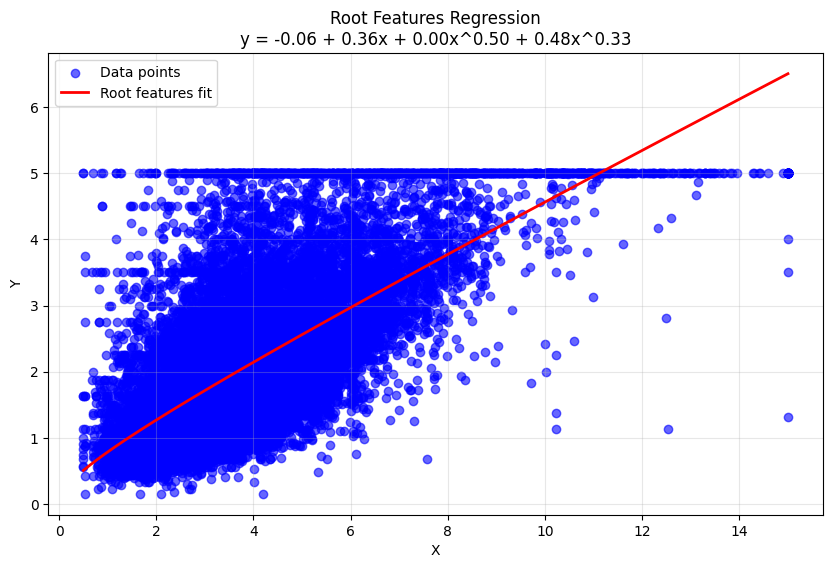

In [14]:
# Plot the original data and root features fit
plt.figure(figsize=(10, 6))
plt.scatter(X_root, Y_root, color='blue', alpha=0.6, label='Data points')

# Generate smooth curve for the model prediction
X_smooth = np.linspace(min(X_root), max(X_root), 200)  # 200 points for a smooth curve
X_root_smooth = add_root_features(X_smooth, max_roots)  # root features
Y_pred = X_root_smooth @ w_root + b_root  # model predictions

# Plot the prediction curve
plt.plot(X_smooth, Y_pred, color='red', linewidth=2, label='Root features fit')

# Add model equation as text on the plot
equation = f'y = {b_root:.2f}'
for i in range(max_roots):
    root_power = f"^{1/(i+1):.2f}" if i > 0 else ""
    equation += f' + {w_root[i]:.2f}x{root_power}'
    
plt.title(f'Root Features Regression\n{equation}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

iter:     0 cost:4.72e+01


/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/2107847737.py:3: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: divide by zero encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: overflow encountered in matmul
  prediction = x @ w + b
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/3279609332.py:2: RuntimeWarning: invalid value encountered in matmul
  prediction = x @ w + b
/Users/ankush/Code/AI-ML/ML-Classified/env/lib/python3

iter:  5000 cost:nan
iter: 10000 cost:nan
iter: 15000 cost:nan
iter: 20000 cost:nan
iter: 25000 cost:nan
iter: 30000 cost:nan
iter: 35000 cost:nan
iter: 40000 cost:nan
iter: 45000 cost:nan
iter: 50000 cost:nan
iter: 55000 cost:nan
iter: 60000 cost:nan
iter: 65000 cost:nan
iter: 70000 cost:nan
iter: 75000 cost:nan
iter: 80000 cost:nan
iter: 85000 cost:nan
iter: 90000 cost:nan
iter: 95000 cost:nan
iter:100000 cost:nan
iter:105000 cost:nan
iter:110000 cost:nan
iter:115000 cost:nan
iter:120000 cost:nan
iter:125000 cost:nan
iter:130000 cost:nan
iter:135000 cost:nan
iter:140000 cost:nan
iter:145000 cost:nan
iter:150000 cost:nan
iter:155000 cost:nan
iter:160000 cost:nan
iter:165000 cost:nan
iter:170000 cost:nan
iter:175000 cost:nan
iter:180000 cost:nan
iter:185000 cost:nan
iter:190000 cost:nan
iter:195000 cost:nan
iter:200000 cost:nan
iter:205000 cost:nan
iter:210000 cost:nan
iter:215000 cost:nan
iter:220000 cost:nan
iter:225000 cost:nan
iter:230000 cost:nan
iter:235000 cost:nan
iter:240000 c

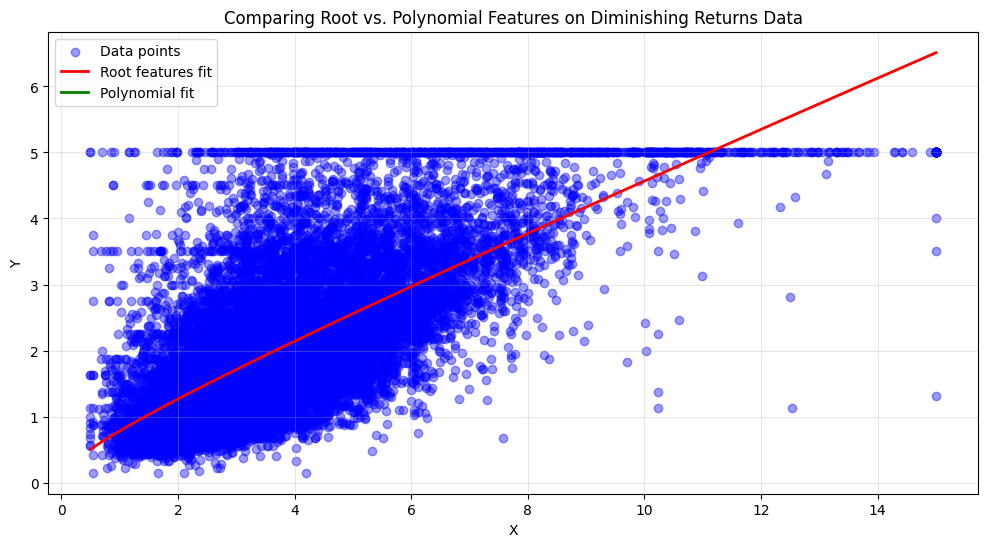

Root features MSE: 0.7002
Polynomial features MSE: nan
Better model: Polynomial features


/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/545795387.py:38: RuntimeWarning: divide by zero encountered in matmul
  Y_pred_root_train = X_root_features @ w_root + b_root
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/545795387.py:38: RuntimeWarning: overflow encountered in matmul
  Y_pred_root_train = X_root_features @ w_root + b_root
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/545795387.py:38: RuntimeWarning: invalid value encountered in matmul
  Y_pred_root_train = X_root_features @ w_root + b_root
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/545795387.py:42: RuntimeWarning: divide by zero encountered in matmul
  Y_pred_poly_train = X_poly_features @ w_poly + b_poly
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel_72411/545795387.py:42: RuntimeWarning: overflow encountered in matmul
  Y_pred_poly_train = X_poly_features @ w_poly + b_poly
/var/folders/bh/24n9t9t15_q_jq7_mpsy8kgw0000gn/T/ipykernel

In [15]:
# Compare polynomial vs. root features on this data

# Try fitting polynomial features to the diminishing returns dataset
poly_degree = 3
X_poly = add_polynomial_features(X_root, poly_degree)

# Train polynomial model
w_poly_init = np.zeros(poly_degree)
b_poly_init = 0

w_poly, b_poly, poly_history = gradient_descent(
    X_poly, Y_root, w_poly_init, b_poly_init, alpha=0.0001, num_iters=500000, tol=1e-6
)

# Generate predictions for both models
X_smooth = np.linspace(min(X_root), max(X_root), 200)
X_root_smooth = add_root_features(X_smooth, max_roots)
Y_pred_root = X_root_smooth @ w_root + b_root

X_poly_smooth = add_polynomial_features(X_smooth, poly_degree)
Y_pred_poly = X_poly_smooth @ w_poly + b_poly

# Plotting both fits
plt.figure(figsize=(12, 6))
plt.scatter(X_root, Y_root, color='blue', alpha=0.4, label='Data points')
plt.plot(X_smooth, Y_pred_root, color='red', linewidth=2, label='Root features fit')
plt.plot(X_smooth, Y_pred_poly, color='green', linewidth=2, label='Polynomial fit')

plt.title('Comparing Root vs. Polynomial Features on Diminishing Returns Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final costs (MSE) - calculate on the original training data
X_root_features = add_root_features(X_root, max_roots)
Y_pred_root_train = X_root_features @ w_root + b_root
root_mse = np.mean((Y_pred_root_train - Y_root)**2)

X_poly_features = add_polynomial_features(X_root, poly_degree)
Y_pred_poly_train = X_poly_features @ w_poly + b_poly
poly_mse = np.mean((Y_pred_poly_train - Y_root)**2)

print(f"Root features MSE: {root_mse:.4f}")
print(f"Polynomial features MSE: {poly_mse:.4f}")
print(f"Better model: {'Root' if root_mse < poly_mse else 'Polynomial'} features")